In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("All libraries imported successfully!")

All libraries imported successfully!


In [3]:
df = pd.read_csv('dataset_heart.csv')

df.columns = df.columns.str.strip()

print("Dataset Shape:", df.shape)
print("\nFirst 5 rows of the dataset:")
print(df.head())

print("\nDataset Information:")
print(df.info())

print("\nDataset Description:")
print(df.describe())

print("\nCleaned Column Names:")
print(df.columns.tolist())

Dataset Shape: (270, 14)

First 5 rows of the dataset:
   age  sex  chest pain type  resting blood pressure  serum cholestoral  \
0   70    1                4                     130                322   
1   67    0                3                     115                564   
2   57    1                2                     124                261   
3   64    1                4                     128                263   
4   74    0                2                     120                269   

   fasting blood sugar  resting electrocardiographic results  max heart rate  \
0                    0                                     2             109   
1                    0                                     2             160   
2                    0                                     0             141   
3                    0                                     0             105   
4                    0                                     2             121   

   exercise i

In [4]:
print("Missing Values in each column:")
print(df.isnull().sum())

print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")

df = df.drop_duplicates()
print(f"Dataset shape after removing duplicates: {df.shape}")

print("\nData types:")
print(df.dtypes)

print("\nTarget variable distribution:")
print(df['heart disease'].value_counts())

Missing Values in each column:
age                                     0
sex                                     0
chest pain type                         0
resting blood pressure                  0
serum cholestoral                       0
fasting blood sugar                     0
resting electrocardiographic results    0
max heart rate                          0
exercise induced angina                 0
oldpeak                                 0
ST segment                              0
major vessels                           0
thal                                    0
heart disease                           0
dtype: int64

Number of duplicate rows: 0
Dataset shape after removing duplicates: (270, 14)

Data types:
age                                       int64
sex                                       int64
chest pain type                           int64
resting blood pressure                    int64
serum cholestoral                         int64
fasting blood sugar                

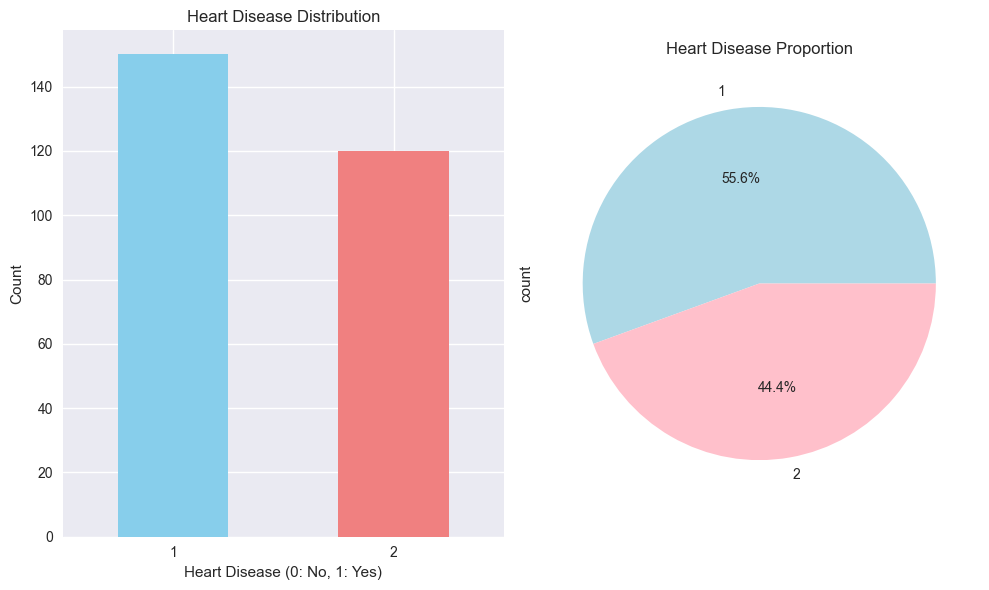

In [5]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
df['heart disease'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Heart Disease Distribution')
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
df['heart disease'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'pink'])
plt.title('Heart Disease Proportion')

plt.tight_layout()
plt.show()

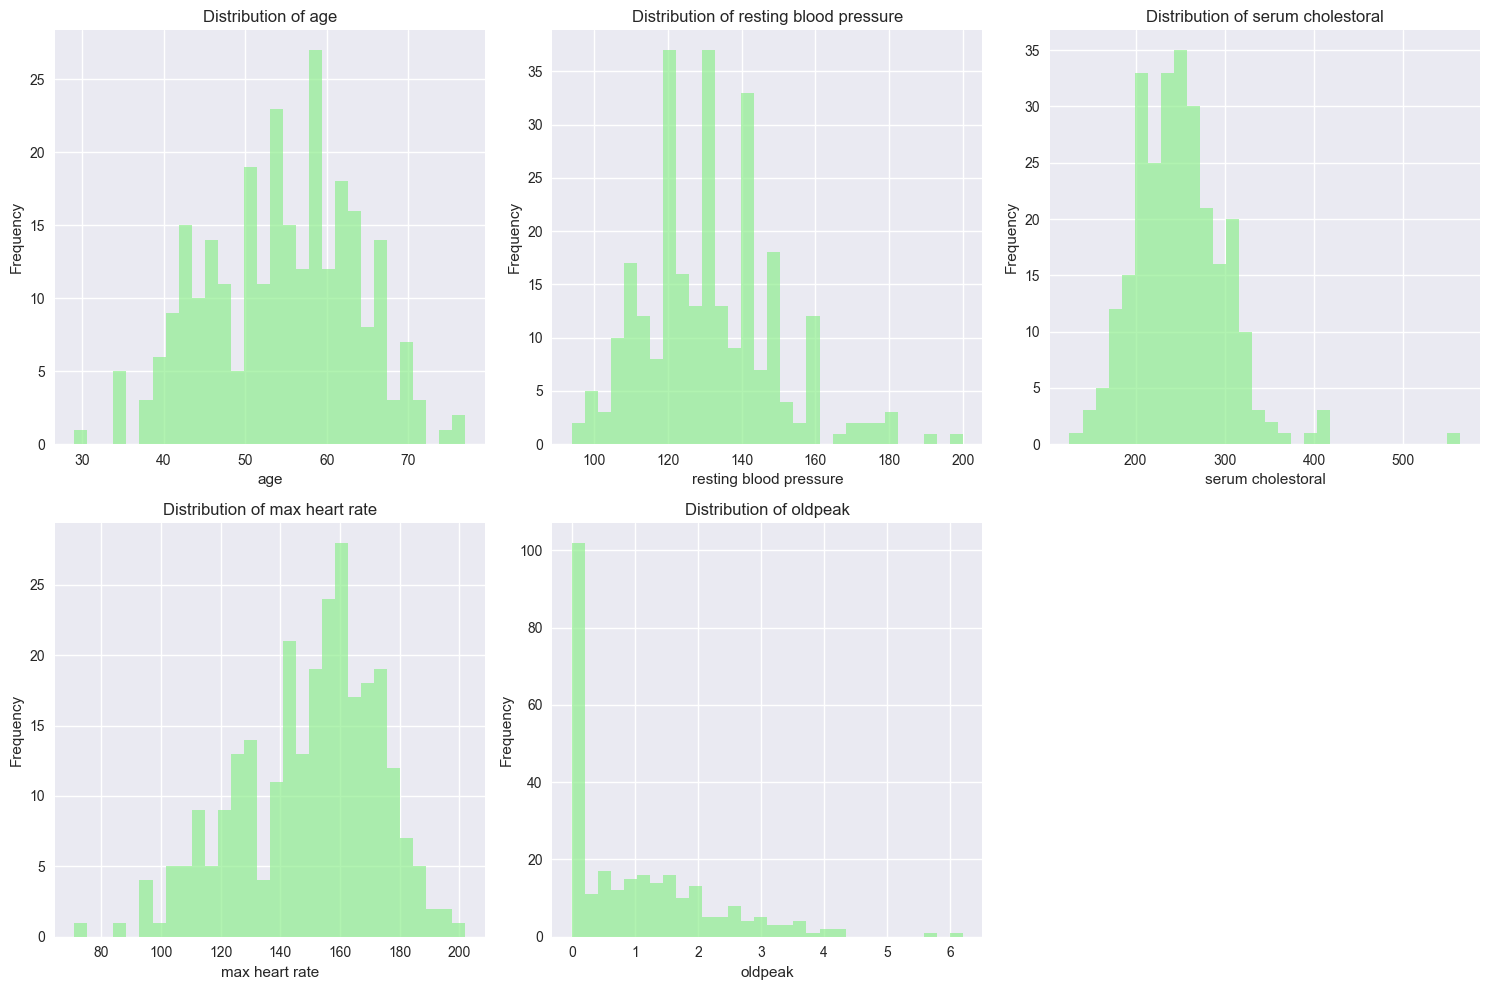

In [6]:
numerical_cols = ['age', 'resting blood pressure', 'serum cholestoral', 'max heart rate', 'oldpeak']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    df[col].hist(bins=30, color='lightgreen', alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

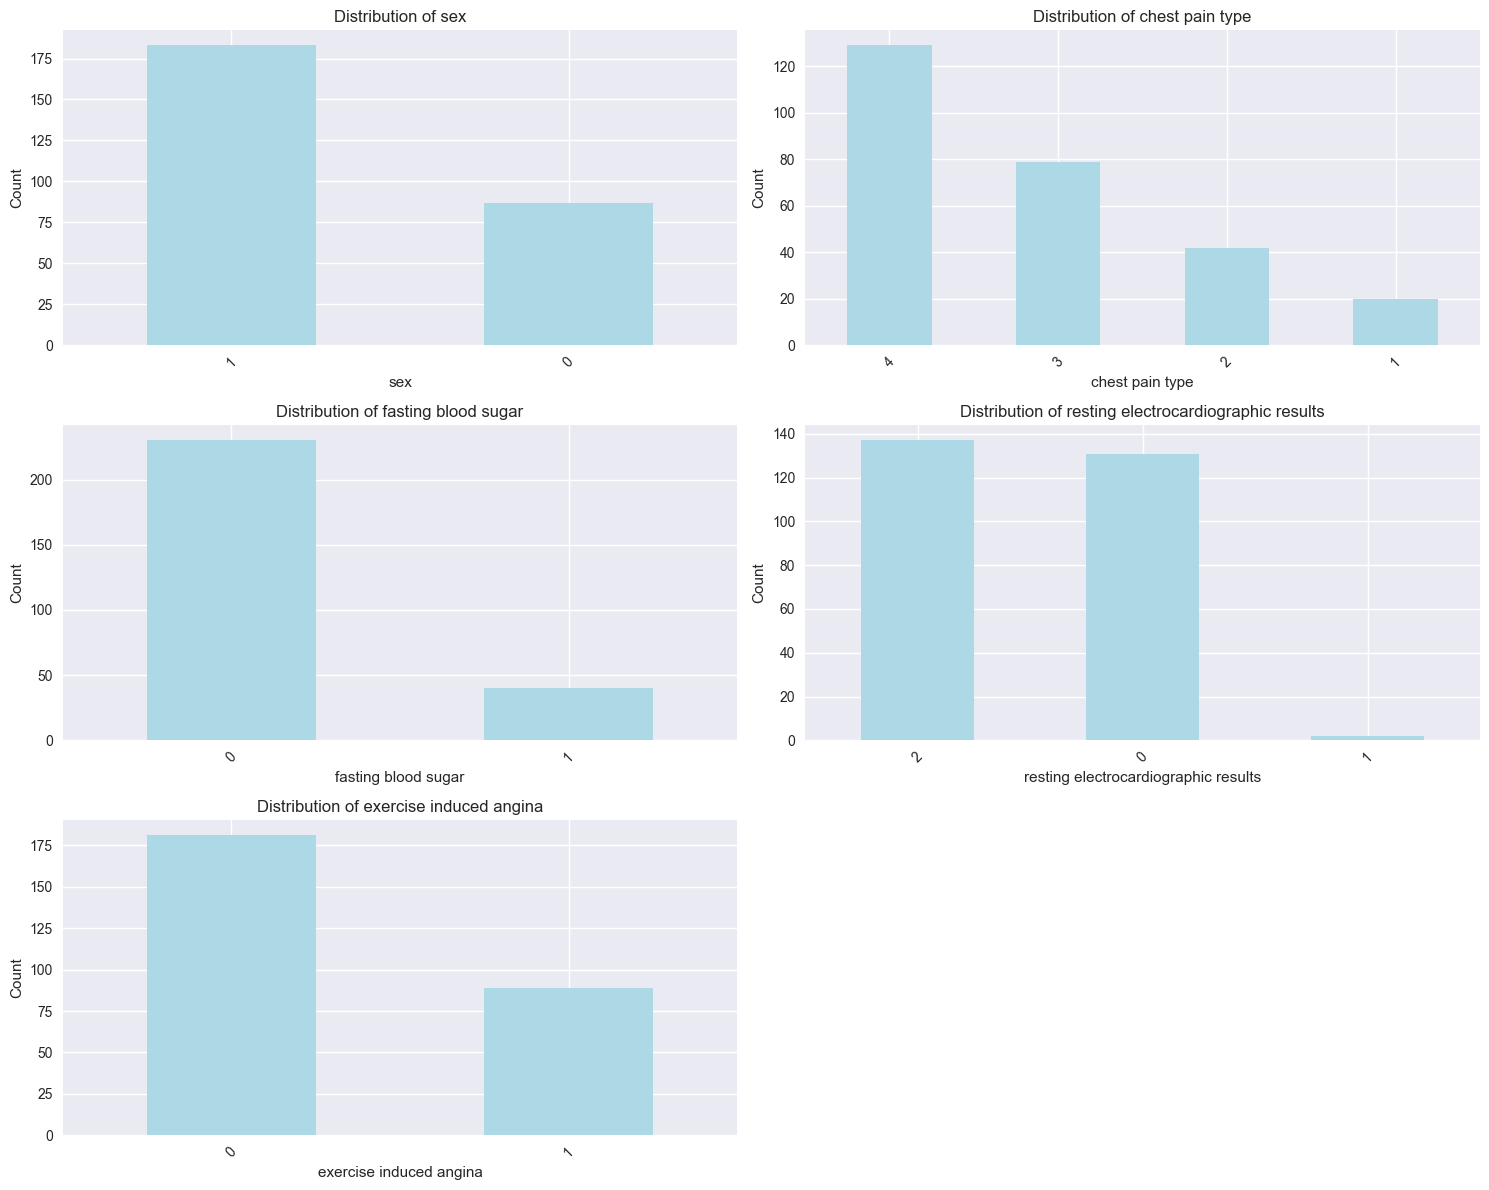


Unique values in categorical columns:
sex: [0, 1]
chest pain type: [1, 2, 3, 4]
fasting blood sugar: [0, 1]
resting electrocardiographic results: [0, 1, 2]
exercise induced angina: [0, 1]


In [7]:
categorical_cols = ['sex', 'chest pain type', 'fasting blood sugar', 
                   'resting electrocardiographic results', 'exercise induced angina']

plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    df[col].value_counts().plot(kind='bar', color='lightblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("\nUnique values in categorical columns:")
for col in categorical_cols:
    print(f"{col}: {sorted(df[col].unique())}")

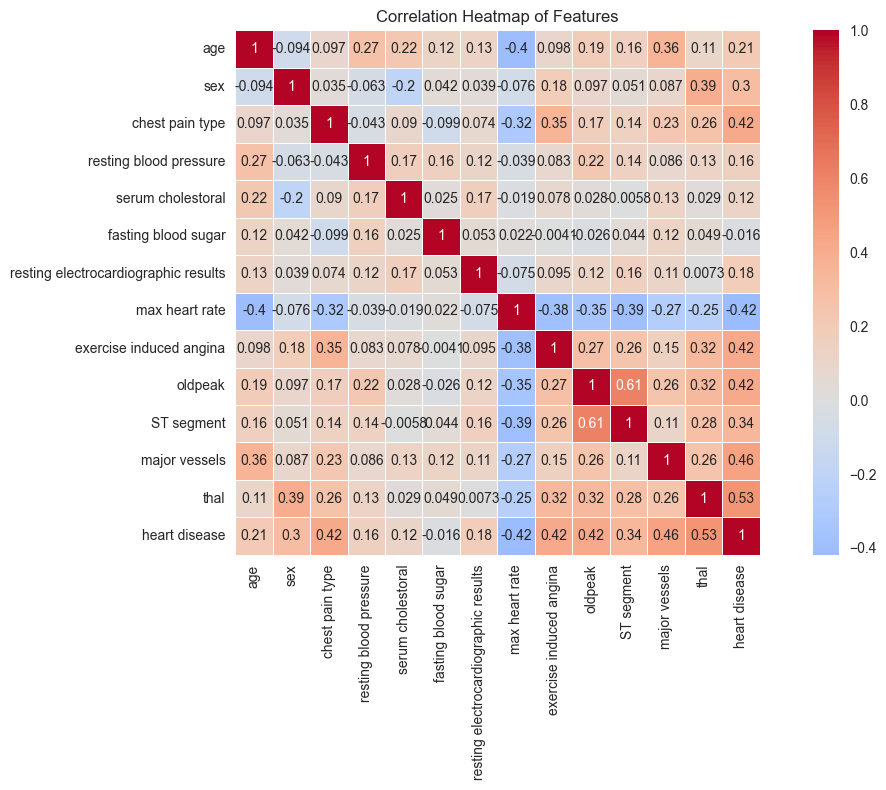

Correlation with Heart Disease:
heart disease                           1.000000
thal                                    0.525020
major vessels                           0.455336
exercise induced angina                 0.419303
oldpeak                                 0.417967
chest pain type                         0.417436
ST segment                              0.337616
sex                                     0.297721
age                                     0.212322
resting electrocardiographic results    0.182091
resting blood pressure                  0.155383
serum cholestoral                       0.118021
fasting blood sugar                    -0.016319
max heart rate                         -0.418514
Name: heart disease, dtype: float64


In [8]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.tight_layout()
plt.show()

print("Correlation with Heart Disease:")
correlation_with_target = df.corr()['heart disease'].sort_values(ascending=False)
print(correlation_with_target)

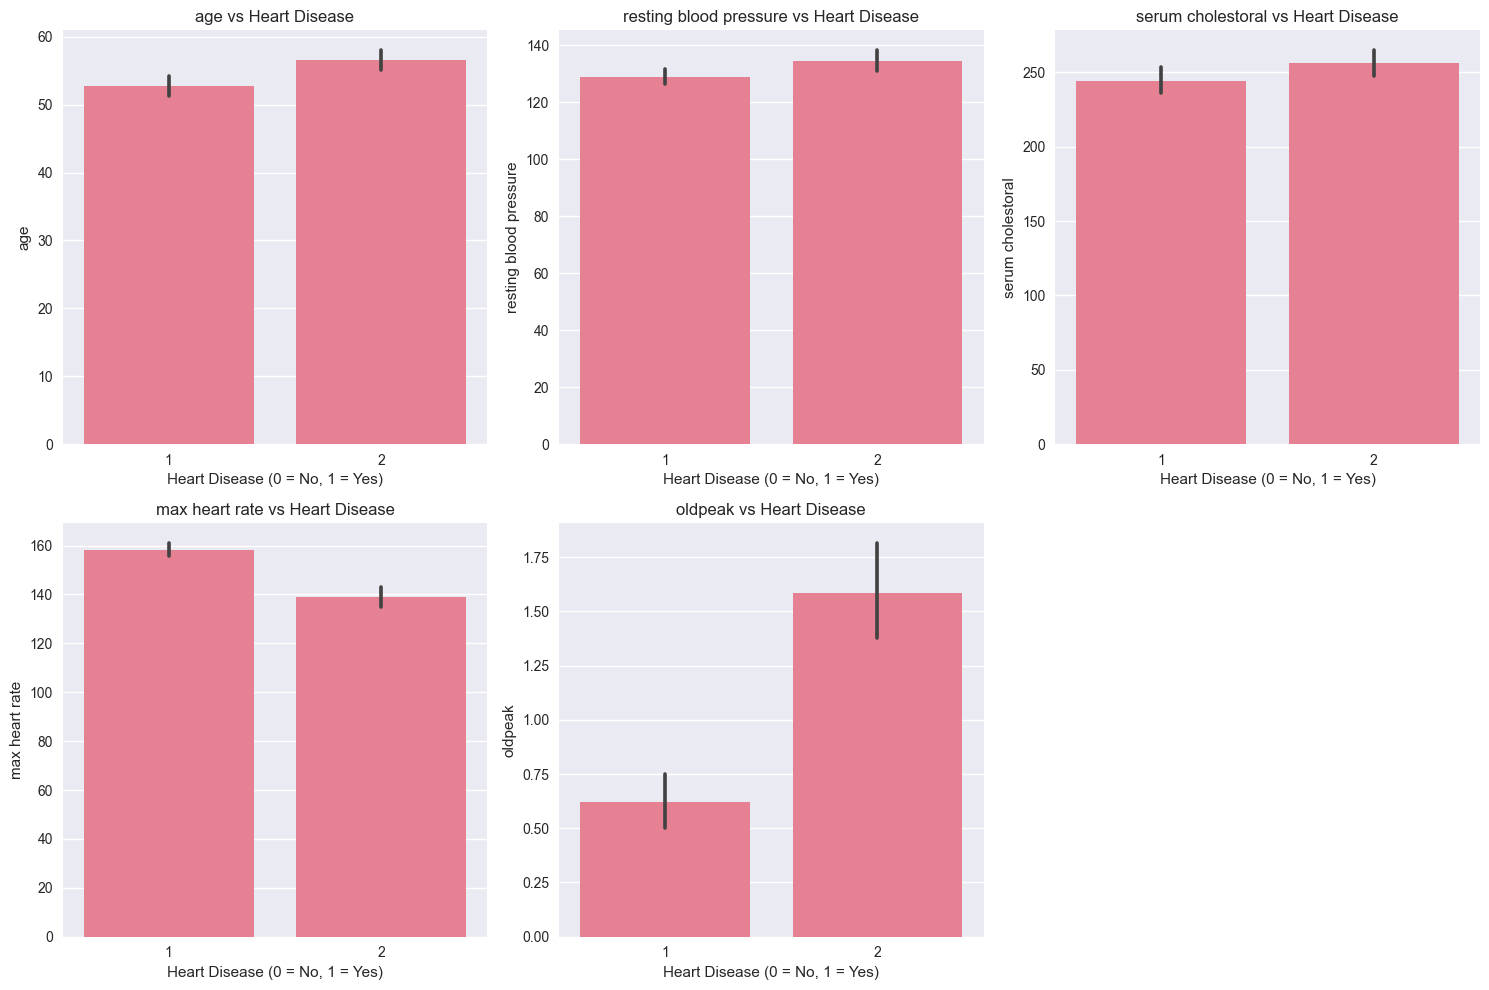

In [12]:
key_features = ['age', 'resting blood pressure', 'serum cholestoral', 'max heart rate', 'oldpeak']

plt.figure(figsize=(15, 10))

for i, feature in enumerate(key_features, 1):
    plt.subplot(2, 3, i)
    sns.barplot(x='heart disease', y=feature, data=df)
    plt.title(f'{feature} vs Heart Disease')
    plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

In [9]:
X = df.drop('heart disease', axis=1)
y = df['heart disease']

print("Features shape:", X.shape)
print("Target shape:", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data preprocessing completed!")

Features shape: (270, 13)
Target shape: (270,)
Training set size: 216
Testing set size: 54
Data preprocessing completed!


In [10]:
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

print("Model training completed!")

y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

print("Predictions made on test set!")

Model training completed!
Predictions made on test set!


Model Accuracy: 0.8519

Classification Report:
              precision    recall  f1-score   support

           1       0.92      0.80      0.86        30
           2       0.79      0.92      0.85        24

    accuracy                           0.85        54
   macro avg       0.85      0.86      0.85        54
weighted avg       0.86      0.85      0.85        54



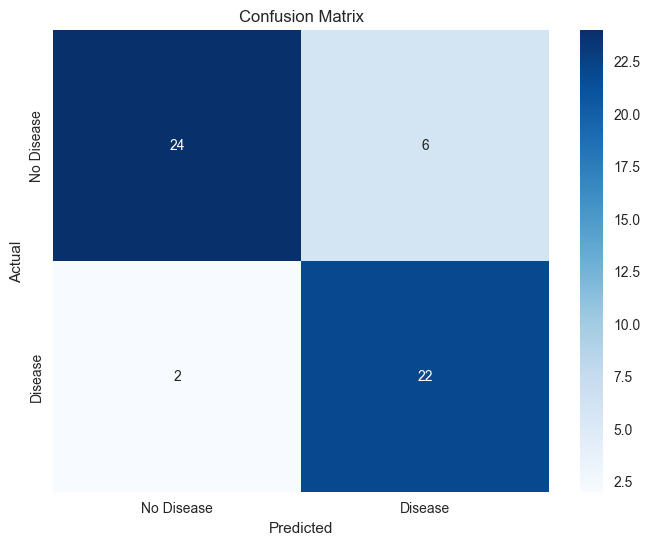

In [11]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Feature Importance:
                                 feature  importance
11                         major vessels    1.185815
1                                    sex    0.892978
2                        chest pain type    0.716174
12                                  thal    0.584059
8                exercise induced angina    0.481397
10                            ST segment    0.413332
3                 resting blood pressure    0.408911
7                         max heart rate    0.399307
5                    fasting blood sugar    0.348062
4                      serum cholestoral    0.341332
9                                oldpeak    0.240689
6   resting electrocardiographic results    0.073099
0                                    age    0.025203


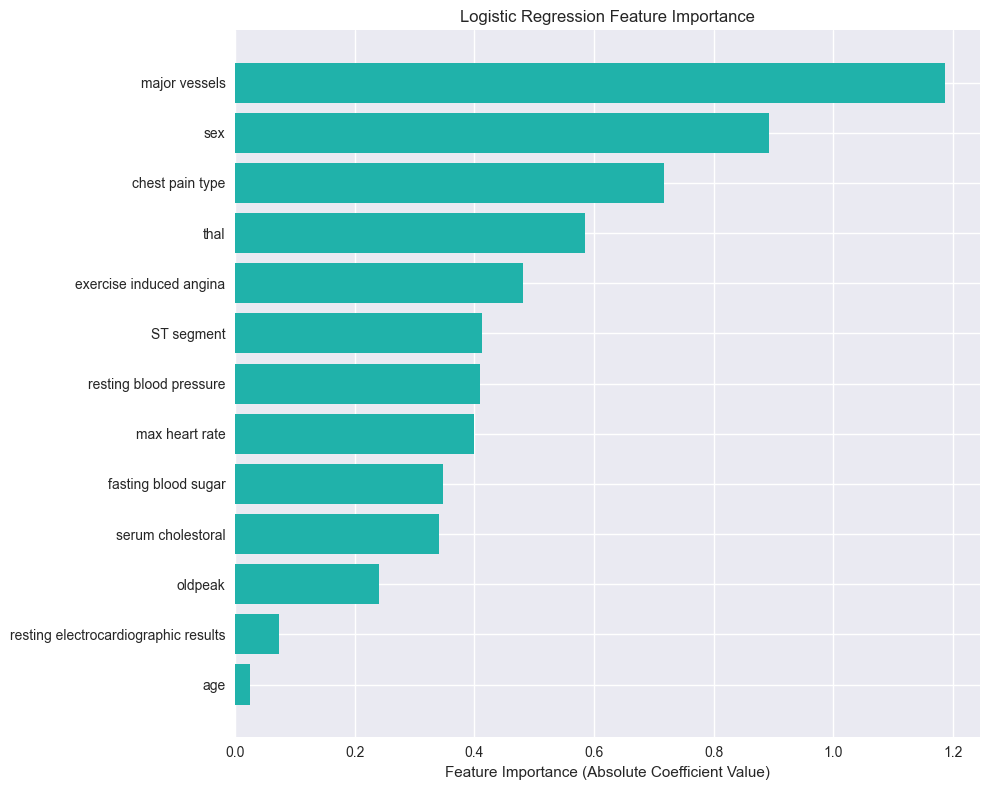

In [12]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': abs(model.coef_[0])
}).sort_values('importance', ascending=False)

print("Feature Importance:")
print(feature_importance)

plt.figure(figsize=(10, 8))
plt.barh(feature_importance['feature'], feature_importance['importance'], color='lightseagreen')
plt.xlabel('Feature Importance (Absolute Coefficient Value)')
plt.title('Logistic Regression Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [13]:
# Final summary
print("=== HEART DISEASE PREDICTION MODEL SUMMARY ===")
print(f"Dataset: {df.shape[0]} samples, {df.shape[1]} features")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"Final Model Accuracy: {accuracy:.4f}")
print(f"Baseline Accuracy (Majority Class): {max(y_test.value_counts(normalize=True)):.4f}")

=== HEART DISEASE PREDICTION MODEL SUMMARY ===
Dataset: 270 samples, 14 features
Training set: 216 samples
Testing set: 54 samples
Final Model Accuracy: 0.8519
Baseline Accuracy (Majority Class): 0.5556


In [ ]:
def test_model():
    """
    Interactive function to test the heart disease prediction model with user input
    """
    print("=== HEART DISEASE PREDICTION TOOL ===")
    print("Please enter the following patient information:\n")
    
    try:
        # Get user input for each feature
        print("1. Personal Information:")
        age = float(input("   Age (years): "))
        sex = int(input("   Sex (0 = female, 1 = male): "))
        
        print("\n2. Medical History:")
        print("   Chest Pain Type:")
        print("   1: Typical angina")
        print("   2: Atypical angina") 
        print("   3: Non-anginal pain")
        print("   4: Asymptomatic")
        chest_pain_type = int(input("   Enter chest pain type (1-4): "))
        
        resting_bp = float(input("   Resting Blood Pressure (mm Hg): "))
        cholesterol = float(input("   Serum Cholesterol (mg/dl): "))
        fasting_blood_sugar = int(input("   Fasting Blood Sugar > 120 mg/dl (0 = no, 1 = yes): "))
        
        print("\n3. Test Results:")
        print("   Resting ECG Results:")
        print("   0: Normal")
        print("   1: Having ST-T wave abnormality")
        print("   2: Showing probable or definite left ventricular hypertrophy")
        resting_ecg = int(input("   Enter resting ECG (0-2): "))
        
        max_heart_rate = float(input("   Maximum Heart Rate Achieved: "))
        exercise_angina = int(input("   Exercise Induced Angina (0 = no, 1 = yes): "))
        oldpeak = float(input("   ST Depression Induced by Exercise (oldpeak): "))
        
        print("   ST Segment:")
        print("   1: Up sloping")
        print("   2: Flat") 
        print("   3: Down sloping")
        st_segment = int(input("   Enter ST segment (1-3): "))
        
        major_vessels = int(input("   Number of Major Vessels Colored by Fluoroscopy (0-3): "))
        
        print("   Thalassemia:")
        print("   3: Normal")
        print("   6: Fixed defect") 
        print("   7: Reversible defect")
        thal = int(input("   Enter thalassemia (3,6,7): "))
        
        user_features = np.array([[
            age, sex, chest_pain_type, resting_bp, cholesterol, 
            fasting_blood_sugar, resting_ecg, max_heart_rate, 
            exercise_angina, oldpeak, st_segment, major_vessels, thal
        ]])
        
        user_features_scaled = scaler.transform(user_features)
        
        prediction = model.predict(user_features_scaled)[0]
        probability = model.predict_proba(user_features_scaled)[0][1]
        
        print("\n" + "="*50)
        print("PREDICTION RESULTS:")
        print("="*50)
        
        if prediction >= 0.5:
            print(f" RESULT: HEART DISEASE DETECTED")
            print(f"   Probability: {probability:.1%}")
            print(f"   Confidence: {'High' if probability > 0.7 else 'Medium' if probability > 0.5 else 'Low'}")
        else:
            print(f" RESULT: NO HEART DISEASE DETECTED") 
            print(f"   Probability of disease: {probability:.1%}")
            print(f"   Confidence: {'High' if probability < 0.3 else 'Medium' if probability < 0.5 else 'Low'}")
        
        print("\nRECOMMENDATION:")
        if prediction == 1:
            print("   Please consult a cardiologist for further evaluation and treatment.")
        else:
            print("   Continue with regular health check-ups and maintain a healthy lifestyle.")
            
        print("="*50)
        
        # Show feature importance for this specific case
        print("\nKey factors influencing this prediction:")
        feature_names = ['Age', 'Sex', 'Chest Pain', 'BP', 'Cholesterol', 
                       'Blood Sugar', 'ECG', 'Max HR', 'Exercise Angina', 
                       'ST Depression', 'ST Segment', 'Major Vessels', 'Thal']
        
        coefficients = model.coef_[0]
        top_features_idx = np.argsort(np.abs(coefficients))[-3:]  
        
        for idx in top_features_idx[::-1]:  
            importance = coefficients[idx]
            user_value = user_features[0][idx]
            print(f"   • {feature_names[idx]}: {user_value} (impact: {'positive' if importance > 0 else 'negative'})")
            
        return prediction, probability
        
    except ValueError as e:
        print(f"\n Error: Please enter valid numerical values. {e}")
        return None, None
    except Exception as e:
        print(f"\n An error occurred: {e}")
        return None, None

print("Function 'test_model' created successfully!")

Function 'test_model' created successfully!


In [17]:
test_model()

=== HEART DISEASE PREDICTION TOOL ===
Please enter the following patient information:

1. Personal Information:

2. Medical History:
   Chest Pain Type:
   1: Typical angina
   2: Atypical angina
   3: Non-anginal pain
   4: Asymptomatic

3. Test Results:
   Resting ECG Results:
   0: Normal
   1: Having ST-T wave abnormality
   2: Showing probable or definite left ventricular hypertrophy
   ST Segment:
   1: Up sloping
   2: Flat
   3: Down sloping
   Thalassemia:
   3: Normal
   6: Fixed defect
   7: Reversible defect

PREDICTION RESULTS:
 RESULT: HEART DISEASE DETECTED
   Probability: 97.8%
   Confidence: High

RECOMMENDATION:
   Continue with regular health check-ups and maintain a healthy lifestyle.

Key factors influencing this prediction:
   • Major Vessels: 2.0 (impact: positive)
   • Sex: 1.0 (impact: positive)
   • Chest Pain: 4.0 (impact: positive)


C:\Users\Chirandip\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


(2, 0.9779872386959105)